In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_excel('/home/socrates/pfe/resume_dataset.xlsx')
df.head()
df.tail()

,Title,Resume
121,Data Analyst,DANIELA\nWHARTON\nAnalytics Manager\ndanielawh...
122,Data Analyst,SYDNEY LOXX\nRevenue Reporting\nData Analyst\n...
123,Data Analyst,CONTACT\nShilpin@email.com\n(123) 456-7890\nSy...
124,Data Analyst,CHARLA SWAIN\nENTRY-LEVEL RISK ADJUSTMENT DATA...
125,Data Analyst,Justine Debowski\nSenior Insurance Data Analys...


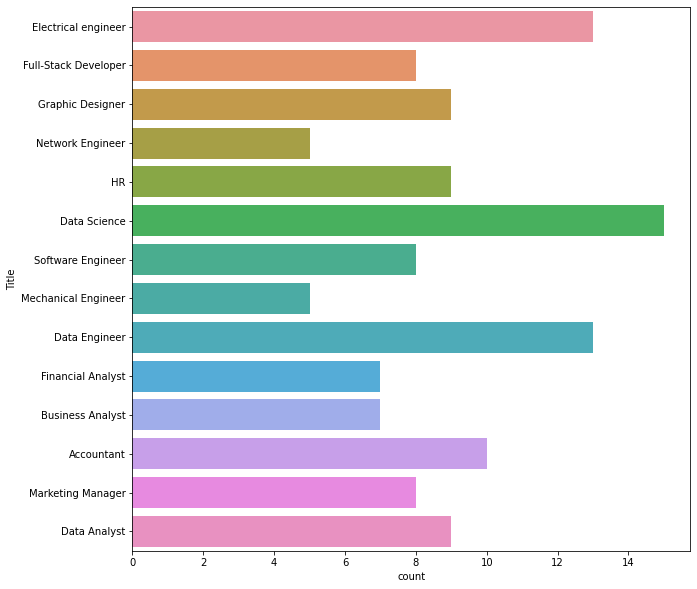

In [3]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.countplot( y = "Title" , data = df ) ;

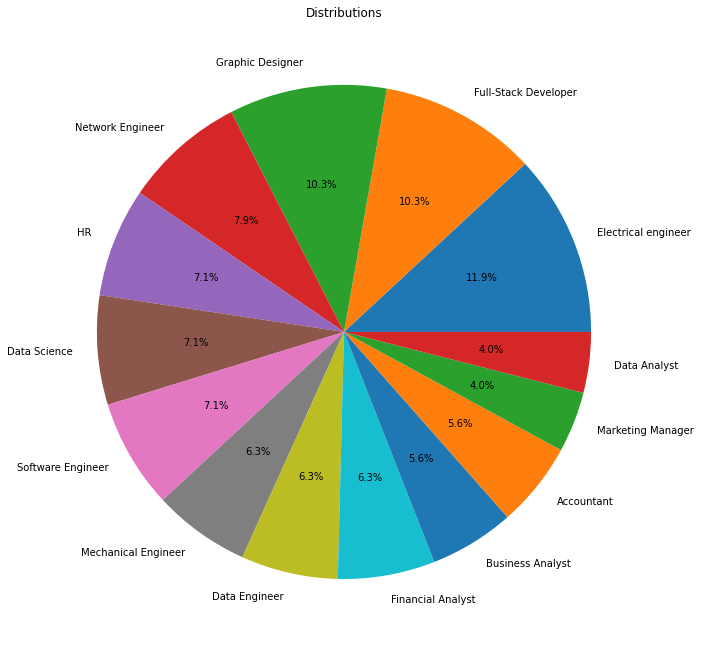

In [4]:
from matplotlib.gridspec import GridSpec

Counts  = df['Title'].value_counts()
Labels  = df['Title'].unique()

plt.figure(1, figsize = (25,25))
grid = GridSpec(2,2)

plt.subplot(grid[0,1], aspect = 1, title = 'Distributions')
pie = plt.pie(Counts, labels = Labels, autopct = '%1.1f%%')


In [5]:
df["Resume"][10]

'CONTACT\n+201005010934/\n+201100286363\nMoh.mahmoud.ali@gmail.com\nMokattam-Cairo-Egypt\nhttps://www.linkedin.com/in/\nmohamed-ali-9441837b\nPERSONAL DATA\n12 May 1987\nEgyptian\nMarried\nExempt after postponed 3 years\nEducation\n2009 G.Y. Faculty of engineering\nelec power & machines dept\n– Cairo University\nLanguage\nArabic (M.T.)- English (V.G.)\nI am a solar electrical Engineer with good background in solar projects\nin large scale and small projects in Egypt, my experience in technical\noffice, site & Tender.\nPROFILE\nworking for Advansys projects Company (CAIRO- EGYPT).\n4 Oct. 2015 till 8 Feb. 2021\nSolar electrical engineer (technical office, site & Tender).\n- Design,install and maintenance of PV systems .\n• Evaluate system performance components including voltage drop,\npower loss, circuit length .\n• Work with Director of Supply Chain to ensure timely procurement of\nrequired supply to proper specification.\n• Create engineering details, elevations, single line diagrams

In [6]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) # remove non-ascii characters
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [7]:
df["Cleaned Resume"] = df.Resume.apply(lambda x: cleanResume(x))
df["Cleaned Resume"][10]

'CONTACT 201005010934 201100286363 Moh mahmoud ali Mokattam Cairo Egypt mohamed ali 9441837b PERSONAL DATA 12 May 1987 Egyptian Married Exempt after postponed 3 years Education 2009 G Y Faculty of engineering elec power machines dept Cairo University Language Arabic M T English V G I am a solar electrical Engineer with good background in solar projects in large scale and small projects in Egypt my experience in technical office site Tender PROFILE working for Advansys projects Company CAIRO EGYPT 4 Oct 2015 till 8 Feb 2021 Solar electrical engineer technical office site Tender Design install and maintenance of PV systems Evaluate system performance components including voltage drop power loss circuit length Work with Director of Supply Chain to ensure timely procurement of required supply to proper specification Create engineering details elevations single line diagrams and other engineering documents Assess evaluate and report on proposals for design efficiencies Communicate engineeri

In [8]:
df.head()

,Title,Resume,Cleaned Resume
0,Electrical engineer,Electrical Power Engineer\n\nEducation\nElectr...,Electrical Power Engineer Education Electrical...
1,Electrical engineer,Electrical engineering student\n\nPersonal Pro...,Electrical engineering student Personal Profil...
2,Electrical engineer,Freshly graduated in electrical engineering sp...,Freshly graduated in electrical engineering sp...
3,Electrical engineer,Electrical engineer\nEDUCATION\nBachelor Degre...,Electrical engineer EDUCATION Bachelor Degree ...
4,Electrical engineer,Electrical Engineer with 7+ years of experienc...,Electrical Engineer with 7 years of experience...


In [9]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [10]:
import nltk
import string
from nltk.corpus import stopwords
from nltk import word_tokenize

paragraph=""
total_words = []
for sentence in df["Cleaned Resume"] :
    paragraph+= sentence
    words = word_tokenize(sentence)
    for word in words :
         if word not in set(stopwords.words('english')) and word not in string.punctuation:
            total_words.append(word)


In [11]:
freq_word = nltk.FreqDist(total_words)
freq_word.most_common(10)

[('data', 365),
 ('team', 164),
 ('Data', 160),
 ('University', 127),
 ('3', 127),
 ('new', 125),
 ('Engineer', 122),
 ('A', 121),
 ('current', 116),
 ('2018', 114)]

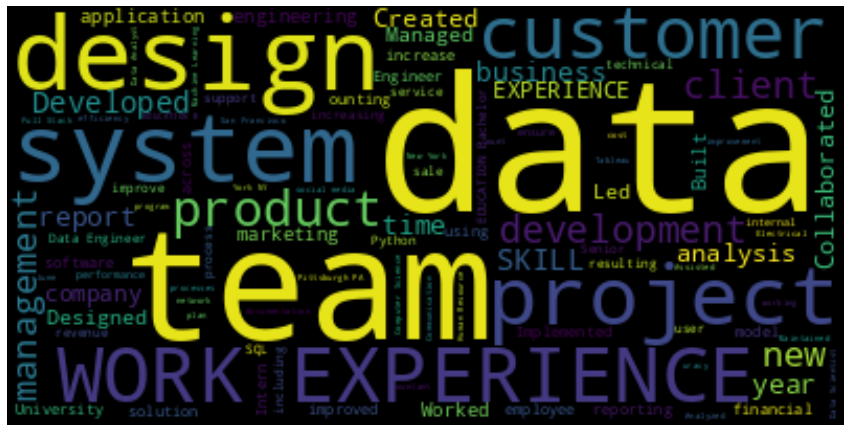

In [12]:
from wordcloud import WordCloud
wc = WordCloud().generate(paragraph)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Labels']=le.fit_transform(df.Title)

In [14]:
df.sample(5)

,Title,Resume,Cleaned Resume,Labels
104,Accountant,Kelton Follows\nStaff Accountant\nExperienced ...,Kelton Follows Staff A ountant Experienced and...,0
108,Accountant,FIADH\nMCCARTHY\nCertified Public\nAccountant ...,FIADH MCCA HY Certified Public A ountant CPA f...,0
49,Data Science,Data Scientist\nGrubhub\nJune 2018 - current\n...,Data Scientist Grubhub June 2018 current Princ...,4
100,Accountant,FELIX CARDONA\nSENIOR ACCOUNTANT\nCONTACT\nfel...,FELIX CARDONA SENIOR ACCOUNTANT CONTACT felixc...,0
76,Data Engineer,CARLA PEREZ\nBIG DATA ENGINEER\nCONTACT\ncarla...,CARLA PEREZ BIG DATA ENGINEER CONTACT carlaper...,3


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

text = df["Cleaned Resume"].values
labels = df["Labels"].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)

vec_df = word_vectorizer.fit_transform(text)
vec_df.shape

(126, 1500)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(vec_df,labels,random_state=0, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(100, 1500)
(100,)
(26, 1500)
(26,)


In [17]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

Accuracy of MultinomialNB Classifier on training set: 0.96
Accuracy of MultinomialNB Classifier on test set: 0.73

 Classification report for classifier OneVsRestClassifier(estimator=MultinomialNB()):
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         0
           3       0.25      1.00      0.40         1
           4       1.00      1.00      1.00         5
           5       0.80      1.00      0.89         4
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         1
          13       0.00      0.00      0.0

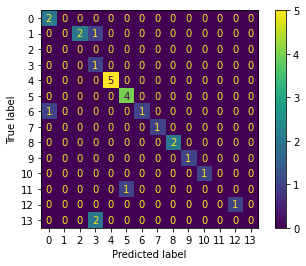

In [18]:
from sklearn.naive_bayes import MultinomialNB

model = OneVsRestClassifier(MultinomialNB()).fit(X_train, y_train)
prediction = model.predict(X_test)

print('Accuracy of MultinomialNB Classifier on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of MultinomialNB Classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (model,classification_report(y_test, prediction)))

ConfusionMatrixDisplay.from_predictions(y_test, model.predict(X_test))
plt.show()

Accuracy of LogisticRegression Classifier on training set: 0.96
Accuracy of LogisticRegression Classifier on test set: 0.69

 Classification report for classifier OneVsRestClassifier(estimator=LogisticRegression()):
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         0
           3       0.25      1.00      0.40         1
           4       1.00      1.00      1.00         5
           5       0.80      1.00      0.89         4
           6       0.00      0.00      0.00         2
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         1
          13       0.00    

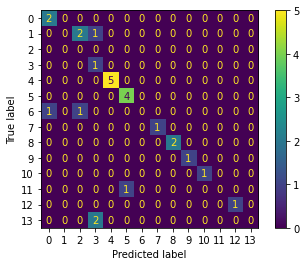

In [19]:
from sklearn.linear_model import LogisticRegression

model = OneVsRestClassifier(LogisticRegression()).fit(X_train,y_train)

prediction = model.predict(X_test)

print('Accuracy of LogisticRegression Classifier on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of LogisticRegression Classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (model,classification_report(y_test, prediction)))

ConfusionMatrixDisplay.from_predictions(y_test, model.predict(X_test))
plt.show()

Accuracy of RandomForest Classifier on training set: 1.00
Accuracy of RandomForest Classifier on test set: 0.77

 Classification report for classifier OneVsRestClassifier(estimator=RandomForestClassifier()):
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         0
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         4
           6       0.00      0.00      0.00         2
           7       0.50      1.00      0.67         1
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      0.50  

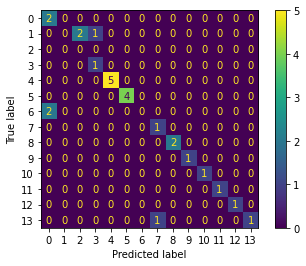

In [20]:
from sklearn.ensemble import RandomForestClassifier

model = OneVsRestClassifier(RandomForestClassifier()).fit(X_train,y_train)
prediction = model.predict(X_test)

print('Accuracy of RandomForest Classifier on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of RandomForest Classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (model,classification_report(y_test, prediction)))

ConfusionMatrixDisplay.from_predictions(y_test, model.predict(X_test))
plt.show()

Accuracy of DecisionTree Classifier on training set: 1.00
Accuracy of DecisionTree Classifier on test set: 0.77

 Classification report for classifier OneVsRestClassifier(estimator=DecisionTreeClassifier()):
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.33      0.50         3
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       1.00      0.80      0.89         5
           5       1.00      1.00      1.00         4
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         1
           8       1.00      0.50      0.67         2
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       0.40      1.00  

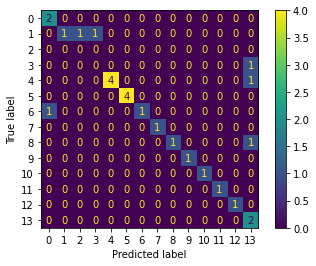

In [21]:
from sklearn.tree import DecisionTreeClassifier

model = OneVsRestClassifier(DecisionTreeClassifier()).fit(X_train,y_train)
prediction = model.predict(X_test)

print('Accuracy of DecisionTree Classifier on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of DecisionTree Classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (model,classification_report(y_test, prediction)))

ConfusionMatrixDisplay.from_predictions(y_test, model.predict(X_test))
plt.show()

Accuracy of KNeighbors Classifier on training set: 0.87
Accuracy of KNeighbors Classifier on test set: 0.85

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         0
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         2
           7       0.50      1.00      0.67         1
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      0.50      0.

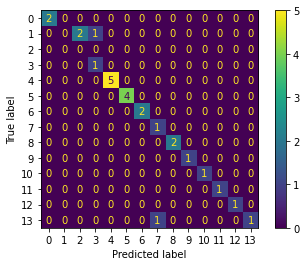

In [22]:
from sklearn.neighbors import KNeighborsClassifier

model = OneVsRestClassifier(KNeighborsClassifier()).fit(X_train,y_train)
prediction = model.predict(X_test)

print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (model,classification_report(y_test, prediction)))

ConfusionMatrixDisplay.from_predictions(y_test, model.predict(X_test))
plt.show()

Accuracy of SGDClassifier Classifier on training set: 1.00
Accuracy of SGDClassifier Classifier on test set: 0.96

 Classification report for classifier OneVsRestClassifier(estimator=SGDClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.0

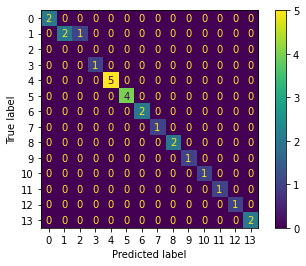

In [23]:
from sklearn.linear_model import SGDClassifier

model = OneVsRestClassifier(SGDClassifier()).fit(X_train,y_train)
prediction = model.predict(X_test)

print('Accuracy of SGDClassifier Classifier on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of SGDClassifier Classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (model,classification_report(y_test, prediction)))

ConfusionMatrixDisplay.from_predictions(y_test, model.predict(X_test))
plt.show()

Accuracy of LinearSVC Classifier on training set: 1.00
Accuracy of LinearSVC Classifier on test set: 0.85

 Classification report for classifier OneVsRestClassifier(estimator=LinearSVC()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         2
           7       0.50      1.00      0.67         1
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      0.50      0.67         2


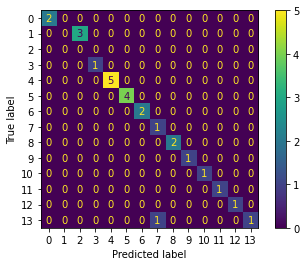

In [24]:
from sklearn.svm import LinearSVC

model = OneVsRestClassifier(LinearSVC()).fit(X_train, y_train)
prediction = model.predict(X_test)

print('Accuracy of LinearSVC Classifier on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of LinearSVC Classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (model,classification_report(y_test, prediction)))

ConfusionMatrixDisplay.from_predictions(y_test, model.predict(X_test))
plt.show()